In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
filename = 'trainable_last_large_beta'
image_title = '$\\|\\beta\\|_2^2$: 16, Trainable: last layer'
plotly_title = r'$\|\beta\|_2^2$: 16, Trainable: last layer'
exp = 'summary/' + filename + '.txt'
with open(exp) as fh:
    out = fh.read()

out = re.split(r'\n', out)

dict_list = []
for d in out:
    try:
        f = eval(d)
        dict_list.append(f)
    except:
        continue

#dict_list = [eval(d) for d in out]
df = pd.DataFrame(dict_list)
#df['lipton-excess'] = (df['lipton'] - df['bayes_error']).astype('float32') 
#df['oracle-excess'] = (df['oracle'] - df['bayes_error']).astype('float32') 
df.dtypes

nodes             int64
epochs            int64
train-mse       float64
majority-mse    float64
minority-mse    float64
dtype: object

In [2]:
measure = ['train-mse', 'majority-mse', 'minority-mse']
agg_dict = dict()
for key in measure:
    agg_dict[key] = ['mean', 'std', 'count']
result = df.groupby(['nodes', 'epochs'], as_index=False).agg(agg_dict)
result

nodes epochs  train-mse                 majority-mse                  \
                        mean       std count         mean       std count   
0        1     20  14.867621  1.947895   299    15.032770  1.523842   299   
1        1     40  14.828846  1.970860   299    15.053100  1.581637   299   
2        1    100  14.804706  2.132527   299    15.044032  1.635739   299   
3        1    500  14.874261  2.089365   299    15.096861  1.536223   299   
4        1   1000  14.810392  2.001067   299    14.986411  1.612090   299   
..     ...    ...        ...       ...   ...          ...       ...   ...   
97   65536     40   0.383305  0.110828   299     0.260829  0.082548   299   
98   65536    100   0.277320  0.096060   299     0.107510  0.030947   299   
99   65536    500   0.221702  0.075272   299     0.141106  0.050767   299   
100  65536   1000   0.201669  0.067169   299     0.167724  0.062740   299   
101  65536   2000   0.180472  0.058526   299     0.188804  0.071202   299   

    minority-mse                  
            mean       std count  
0      15.286181  1.419148   299  
1      15.316724  1.702241   299  
2      15.311249  1.750857   299  
3      15.343792  1.765214   299  
4      15.391967  1.629924   299  
..           ...       ...   ...  
97      5.495980  0.411280   299  
98      5.754800  0.355829   299  
99      5.854559  0.340300   299  
100     5.895774  0.338797   299  
101     5.923410  0.339599   299  

[102 rows x 11 columns]

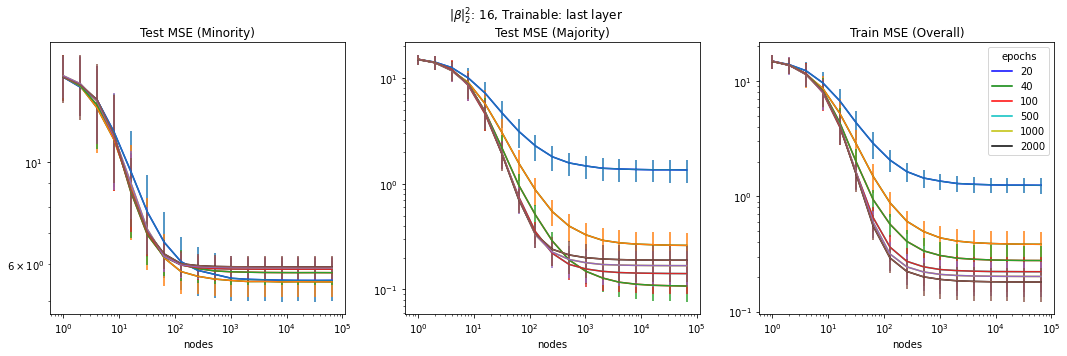

In [3]:
epochs_list = np.unique(df['epochs'])
color_list = 'bgrcyk'

fig, ax = plt.subplots(1, 3, figsize = (18, 5), sharex=True)
for epochs, color in zip(epochs_list, color_list):
    result1 = result.loc[result['epochs']==epochs]
    nodes, mean, std, count = result1['nodes'], result1['minority-mse']['mean'], result1['minority-mse']['std'],\
     result1['minority-mse']['count']
    ax[0].plot(nodes, mean, color)
    ax[0].errorbar(nodes, mean, std)
    ax[0].set_yscale('log')
    ax[0].set_xscale('log')
    ax[0].set_title('Test MSE (Minority)')
    ax[0].set_xlabel('nodes')


    mean, std, count = result1['majority-mse']['mean'], result1['majority-mse']['std'], result1['majority-mse']['count']
    ax[1].plot(nodes, mean, color)
    ax[1].errorbar(nodes, mean, std)
    ax[1].set_yscale('log')
    ax[1].set_xscale('log')
    ax[1].set_title('Test MSE (Majority)')
    ax[1].set_xlabel('nodes')

    mean, std, count = result1['train-mse']['mean'], result1['train-mse']['std'], result1['train-mse']['count']
    ax[2].plot(nodes, mean, color)
    ax[2].errorbar(nodes, mean, std)
    ax[2].set_yscale('log')
    ax[2].set_xscale('log')
    ax[2].set_title('Train MSE (Overall)')
    ax[2].set_xlabel('nodes')

fig.suptitle(image_title)
plt.legend(epochs_list, title='epochs')
plt.savefig('pdf_plots/' + filename + '.pdf')

In [4]:
epochs_list = np.unique(df['epochs'])
color_list=['red', 'green', 'blue', 'black', 'purple', 'orange']

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly
fig = make_subplots(rows = 1, cols=3, subplot_titles=['Test MSE (minority)', 'Test MSE (majority)', 'Train MSE (overall)'])
for epochs, color in zip(epochs_list, color_list):
    line = go.scatter.Line(color = color)
    result1 = result.loc[result['epochs']==epochs]
    nodes, mean, std, count = result1['nodes'], result1['minority-mse']['mean'], result1['minority-mse']['std'],\
     result1['minority-mse']['count']
    error_y = dict(type = 'data', array = std, color = color, width = 0, thickness = 0.9)
    marker = dict(size = 3)
    fig.append_trace(go.Scatter(x = nodes, y = mean, line = line, error_y = error_y, marker = marker, name = str(epochs),\
         legendgroup = str(epochs), showlegend = False), row = 1, col = 1)

    mean, std, count = result1['majority-mse']['mean'], result1['majority-mse']['std'], result1['majority-mse']['count']
    error_y['array'] = std
    fig.append_trace(go.Scatter(x = nodes, y = mean, line = line,  error_y = error_y, marker = marker, name = str(epochs),\
        legendgroup = str(epochs), showlegend = False), row = 1, col = 2)

    mean, std, count = result1['train-mse']['mean'], result1['train-mse']['std'], result1['train-mse']['count']
    error_y['array'] = std
    fig.append_trace(go.Scatter(x = nodes, y = mean, line = line, error_y = error_y, marker = marker,  name = str(epochs),\
        legendgroup = str(epochs), showlegend = True), row = 1, col = 3)


fig.update_xaxes(type = 'log', title = 'nodes')
fig.update_layout(height = 400, width = 1000, legend_title_text='epochs', title = plotly_title)

fig.show()
plotly.offline.plot(fig, filename = 'html_plots/' + filename + '.html')

'html_plots/trainable_last_large_beta.html'

In [5]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
with open('mses.txt', 'r') as f:
    out = f.read()
out = re.split(r'\n', out)
dict_list = []
for d in out:
    try:
        f = eval(d)
        dict_list.append(f)
    except:
        continue



df = pd.DataFrame(dict_list)
df.dtypes
df1 = df.loc[df['epochs'] == 5000]

In [9]:
measure = ['train-mse', 'majority-mse', 'minority-mse']
agg_dict = dict()
for key in measure:
    agg_dict[key] = ['mean', 'std', 'count']
result = df1.groupby(['setup', 'beta-norm',  'nodes'], as_index=False).agg(agg_dict)
result

setup beta-norm  nodes   train-mse                   \
                                                     mean        std count   
0   different-core-over-envs       0.1     10    0.964858   0.138972   500   
1   different-core-over-envs       0.1     40    1.156454   0.110206   500   
2   different-core-over-envs       0.1    160    1.015079   0.089562   500   
3   different-core-over-envs       0.1    640    0.601840   0.055232   500   
4   different-core-over-envs       0.1   2560    0.147049   0.019032   500   
5   different-core-over-envs       0.1  10240    0.011952   0.002278   500   
6   different-core-over-envs       1.0     10    3.032185   0.619724   500   
7   different-core-over-envs       1.0     40    1.460649   0.153575   500   
8   different-core-over-envs       1.0    160    1.019514   0.090573   500   
9   different-core-over-envs       1.0    640    0.596075   0.054005   500   
10  different-core-over-envs       1.0   2560    0.146781   0.020860   500   
11  different-core-over-envs       1.0  10240    0.011760   0.002282   500   
12  different-core-over-envs       5.0     10   54.190673  15.690302   500   
13  different-core-over-envs       5.0     40    9.160974   2.510403   500   
14  different-core-over-envs       5.0    160    1.390060   0.123886   500   
15  different-core-over-envs       5.0    640    0.632771   0.057500   500   
16  different-core-over-envs       5.0   2560    0.150023   0.019446   500   
17  different-core-over-envs       5.0  10240    0.012041   0.002272   500   
18  different-core-over-envs      10.0     10  217.892488  64.927569   500   
19  different-core-over-envs      10.0     40   33.552503   9.764514   500   
20  different-core-over-envs      10.0    160    2.534983   0.299757   500   
21  different-core-over-envs      10.0    640    0.752777   0.060137   500   
22  different-core-over-envs      10.0   2560    0.159770   0.020299   500   
23  different-core-over-envs      10.0  10240    0.012657   0.002494   500   
24       same-core-over-envs       0.1     10    4.968894   0.355271   500   
25       same-core-over-envs       0.1     40    4.732967   0.410233   500   
26       same-core-over-envs       0.1    160    4.003323   0.371974   500   
27       same-core-over-envs       0.1    640    2.534503   0.247887   500   
28       same-core-over-envs       0.1   2560    1.008709   0.124309   500   
29       same-core-over-envs       0.1  10240    0.153020   0.031941   500   
30       same-core-over-envs       1.0     10    7.026966   1.070899   500   
31       same-core-over-envs       1.0     40    4.989579   0.430569   500   
32       same-core-over-envs       1.0    160    3.989823   0.348337   500   
33       same-core-over-envs       1.0    640    2.505658   0.231690   500   
34       same-core-over-envs       1.0   2560    0.996462   0.111272   500   
35       same-core-over-envs       1.0  10240    0.148245   0.028733   500   
36       same-core-over-envs       5.0     10   59.867759  16.789348   500   
37       same-core-over-envs       5.0     40   12.501672   2.601380   500   
38       same-core-over-envs       5.0    160    4.369451   0.366698   500   
39       same-core-over-envs       5.0    640    2.577545   0.244134   500   
40       same-core-over-envs       5.0   2560    1.013784   0.120861   500   
41       same-core-over-envs       5.0  10240    0.152394   0.028733   500   
42       same-core-over-envs      10.0     10  219.167477  61.339279   500   
43       same-core-over-envs      10.0     40   37.341525  10.569296   500   
44       same-core-over-envs      10.0    160    5.487275   0.490521   500   
45       same-core-over-envs      10.0    640    2.688395   0.257795   500   
46       same-core-over-envs      10.0   2560    1.028134   0.128947   500   
47       same-core-over-envs      10.0  10240    0.155727   0.033066   500   

   majority-mse                  minority-mse                   
           mean        std count         mean        std 

fig, ax = plt.subplots(1, 3, figsize = (18, 5), sharex=True)
betas = [1, 5, 10]
for i, beta in enumerate(betas):
    result1 = result.loc[result['beta-norm']==beta]
    nodes, mean_minor, std_minor = result1['nodes'],\
         result1['minority-mse']['mean'], result1['minority-mse']['std']

    mean_major, std_major = result1['majority-mse']['mean'], result1['majority-mse']['std']
    mean_tr, std_tr = result1['train-mse']['mean'], result1['train-mse']['std']
    
    ax[i].errorbar(nodes, mean_minor, std_minor, color = 'k', linestyle = '-', marker = '*')
    ax[i].errorbar(nodes, mean_major, std_major, color = 'orange', linestyle = '-', marker = '+')
    ax[i].errorbar(nodes, mean_tr, std_tr, color = 'g', linestyle = '-', marker = 'x')
    #ax[0].set_yscale('log')
    ax[i].set_xscale('log')
    ax[i].title.set_text(f'SNR={beta**2}')
lines = [Line2D([0], [0], color='k', linestyle='-', marker='*'), \
    Line2D([0], [0], color='orange', linestyle='-', marker='+'), \
        Line2D([0], [0], color='g', linestyle='-', marker='x')]  

plt.legend(lines, ['Minority', 'Majority', 'Balanced Train'], title='MSE')
#plt.title('$\\text{SNR}=\\frac{\\|\\beta\\|_2^2}{\\|\\delta\\|_2^2}$')
plt.savefig('pdf_plots/plot.pdf')

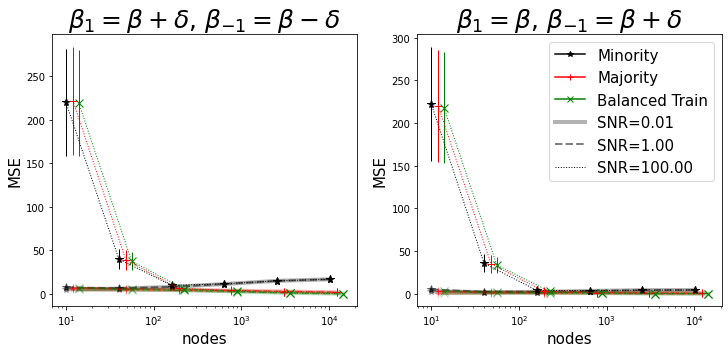

In [11]:
betas = [0.1, 1, 10]
ltys = ['-', '--', ':']
lws = [4, 2, 1]
alphas = [0.3, 0.5, 1]
add_on = 4 ** np.array(range(6))
setups = ['same-core-over-envs', 'different-core-over-envs']
names = ['$\\beta_{1} = \\beta + \\delta$, $\\beta_{-1} = \\beta - \\delta$',\
     '$\\beta_{1} = \\beta$, $\\beta_{-1} = \\beta + \\delta$']
fig, ax = plt.subplots(1, 2, figsize = (12, 5), sharex=True)
for s, (setup, name) in enumerate(zip(setups, names)):
    result_setup = result.loc[result['setup']==setup]
    for i, (beta, lty, lw, alpha) in enumerate(zip(betas, ltys, lws, alphas)):
        result1 = result_setup.loc[result['beta-norm']==beta]
        nodes, mean_minor, std_minor = result1['nodes'],\
            result1['minority-mse']['mean'], result1['minority-mse']['std']

        mean_major, std_major = result1['majority-mse']['mean'], result1['majority-mse']['std']
        mean_tr, std_tr = result1['train-mse']['mean'], result1['train-mse']['std']
    
        ax[s].errorbar(nodes, mean_minor, std_minor, color = 'k', linestyle = lty,\
             marker = '*', markersize = 8, lw = lw, alpha = alpha)
        ax[s].errorbar(nodes * (1.2), mean_major, std_major, color = 'r', linestyle = lty,\
         marker = '+', markersize = 8, lw = lw, alpha = alpha)
        ax[s].errorbar(nodes * (1.4), mean_tr, std_tr, color = 'g', linestyle = lty, marker = 'x',\
         markersize = 8, lw = lw, alpha = alpha)
        #ax[s].set_yscale('log')
        ax[s].set_xscale('log')
        ax[s].set_xlabel('nodes', fontsize = 15)
        ax[s].set_ylabel('MSE', fontsize = 15)
        ax[s].set_title(name, fontsize = 25)
        #ax[s].set_ylim(0, 20)
        
    
lines = [Line2D([0], [0], color='k', linestyle='-', marker='*'), \
    Line2D([0], [0], color='r', linestyle='-', marker='+'), \
        Line2D([0], [0], color='g', linestyle='-', marker='x')\
        ]  
labels = ['Minority', 'Majority', 'Balanced Train']
for i, (beta, lty, lw, alpha) in enumerate(zip(betas, ltys, lws, alphas)):
    lines.append(Line2D([0], [0], color='k', linestyle=lty, lw = lw, alpha = alpha))
    labels.append('SNR=%.2f'%(beta**2))
plt.legend(lines, labels, fontsize = 15)
plt.savefig('pdf_plots/plot.pdf')

In [8]:
nodes * 1.1

12       11.0
13       44.0
14      176.0
15      704.0
16     2816.0
17    11264.0
Name: nodes, dtype: float64